# Sprint 3 – Identificação de Outliers 
Olá! Continuando a análise, agora eu vou investigar se existem valores extremos (outliers) nos dados. Esses valores podem atrapalhar algumas análises e visualizações, então é importante entender onde eles estão.

In [6]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

In [7]:
# Carregando os dados de pagamentos (que vou usar para analisar valores monetários)
pagamentos = pd.read_csv('../data/raw/olist_order_payments_dataset.csv')

## 1. Visualizando os valores de pagamento
Vou começar vendo a distribuição dos valores pagos.

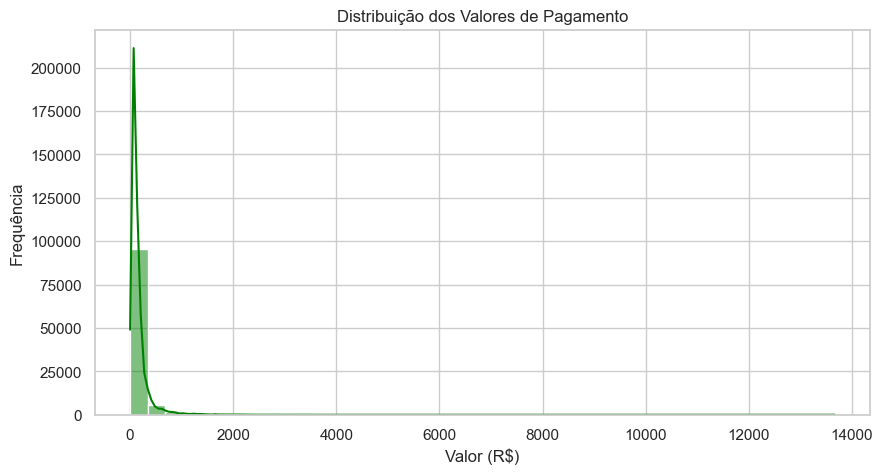

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(pagamentos['payment_value'], bins=40, kde=True, color='green')
plt.title('Distribuição dos Valores de Pagamento')
plt.xlabel('Valor (R$)')
plt.ylabel('Frequência')
plt.show()

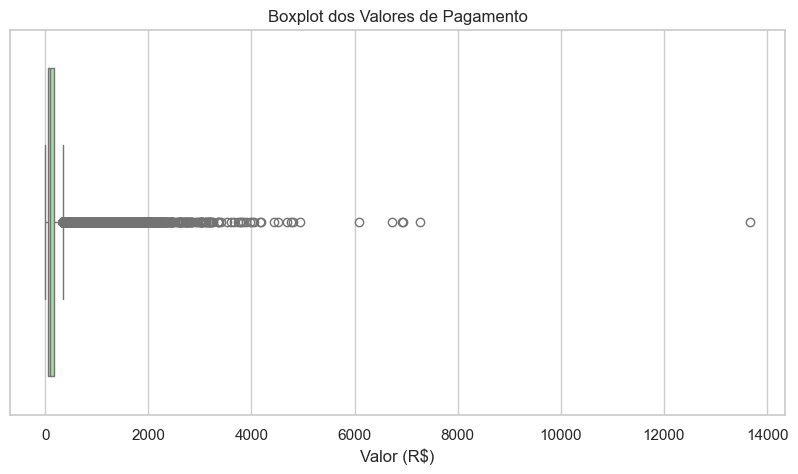

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=pagamentos['payment_value'], color='lightgreen')
plt.title('Boxplot dos Valores de Pagamento')
plt.xlabel('Valor (R$)')
plt.show()

Pelo boxplot dá pra ver que existem alguns valores bem mais altos do que a maioria. Esses são os chamados **outliers**.

## 2. Detectando Outliers com IQR
Vou usar o método do IQR (Intervalo Interquartil) para identificar os outliers.

In [10]:
# Função para detectar outliers
def detectar_outliers_iqr(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    return outliers

# Aplicando na coluna de pagamento
outliers_pagamento = detectar_outliers_iqr(pagamentos['payment_value'])
print(f'Total de outliers encontrados: {len(outliers_pagamento)}')
print(f'Porcentagem sobre o total: {len(outliers_pagamento) / len(pagamentos) * 100:.2f}%')

Total de outliers encontrados: 7981
Porcentagem sobre o total: 7.68%


## 3. O que fazer com esses outliers?
Nem todo outlier é um erro. Alguns pedidos realmente podem ter valores altos, por exemplo, compras grandes ou com muitas parcelas.

**Decisão:**
- Não vou remover os outliers.
- Em análises que usam média, vou considerar usar a mediana, que é menos sensível a esses valores extremos.

## 4. Conclusão
Consegui identificar que existe uma pequena porcentagem de pagamentos com valores muito acima da média. Como esses casos podem ser legítimos, decidi manter os dados como estão. Vou seguir para a próxima etapa com isso em mente.